# Trabajo Práctico 0:  Algoritmo de Maximización de la Esperanza

**Profesor**: Saúl Calderón Ramírez

**Estudiantes**: 

* Ricardo Chacon
* Marco Ferraro
* Gabriel Valentine


## 1. Algoritmo de Maximización de la Esperanza con datos artificiales

En esta sección se llevará a cabo una implementación de un algoritmo de maximización de la esperanza. Se utilizará un grupo de funciones base.

### 1.1 Generate Data

Esta función se encarga de generar observaciones aleatorias de `K` distribuciones Gaussianas. Por defecto `K` va a presentar valor de 2.  Se recibe de parametro `N` que representa la tolidad de puntos u observaciones que se quiere generar. Un array de medias y otro de desviaciones estandar de las distribuciones respectivas. 

Cabe destacar que esta función retorna todas las observaciones en una matriz de dimension `Nx1`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def generate_data(N, means: np.ndarray, stds: np.ndarray, K=2):
  if len(means) != len(stds):
    print("Error in dimensions")
    return None
  else:
    data = []
    for i in range(K):
      y = np.sqrt(-2 * np.log(np.random.rand(N // K))) * np.cos(2 * np.pi * np.random.rand(N // 2))
      y = (y * stds[i]) + means[i]

      data.append(y)

    X = np.concatenate(data)
    
    # Mezclar datos para que no esten ordenados
    np.random.shuffle(X)

    return X.reshape(-1, 1)



Adicionalmente, vamos a usar una función `Plot Data` para graficar las observaciones en un eje horizontal. Asimismo, vamos a realizar histogramas sobre el mismo gráfico para poder visualizar las distribuciones normales.

In [3]:
def plot_data(data, title='Two Normal Distributions'):
    hist_values, bin_edges = np.histogram(data, bins=20)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), color='skyblue', alpha=0.7, label='Frequency')
    ax.scatter(data, np.zeros_like(data), marker='o', s=30, color='b', label='Data')

    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 0.5, y_max + 0.1)

    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.grid(True, which='both')
    
    ax.legend()
    plt.show()

### 1.2 Inicialización aleatoria de Parámetros

Se requiere de una función para inicializar los parametros de dichas distribuciones. Se va a utilizar una función `init_random_parameters` que inicializa un arreglo de medias y desviaciones estandar de forma aleatoria. Esta función recibe un `K` que indica cuantas distribuciones se tienen que generar y un rango para las medias y desviaciones estandar. Utilizamos `numpy` para generar los valores aleatorios y desempacar el valor de las tuplas. 

La salida de la función es una matriz, donde cada arreglo representa 

In [4]:

def init_random_parameters(K, mean_range=(0, 10), std_range=(0, 1)):
  means = np.random.uniform(*mean_range, size=K)
  stds = np.random.uniform(*std_range, size=K)
  
  params = np.column_stack((means, stds)).tolist()

  return params

In [5]:
params = init_random_parameters(2)
params

[[4.736076565592501, 0.3853913840567499],
 [8.535367222816392, 0.3796201716934825]]

In [6]:
data = generate_data(N=150, means=[row[0] for row in params], stds=[row[1] for row in params])
data

array([[4.68632704],
       [8.60415621],
       [8.80152201],
       [8.65951278],
       [4.66486063],
       [8.61978169],
       [8.38683835],
       [7.81395604],
       [5.35741161],
       [7.7887209 ],
       [8.69124378],
       [4.49369205],
       [8.35031293],
       [4.5810815 ],
       [4.42569141],
       [5.09498958],
       [8.68047379],
       [8.847048  ],
       [5.18478081],
       [8.76035256],
       [5.21913954],
       [4.86978833],
       [5.27247501],
       [5.34770715],
       [8.42025016],
       [5.135624  ],
       [8.51432129],
       [8.55558987],
       [8.15094597],
       [8.2665274 ],
       [4.86614828],
       [4.45350805],
       [8.4103352 ],
       [8.68661059],
       [8.4629178 ],
       [4.51991038],
       [8.64203976],
       [5.37739836],
       [4.67642239],
       [5.71834702],
       [9.04305662],
       [5.01167337],
       [8.41856307],
       [4.79374209],
       [5.08781615],
       [8.02249958],
       [5.24949366],
       [8.157

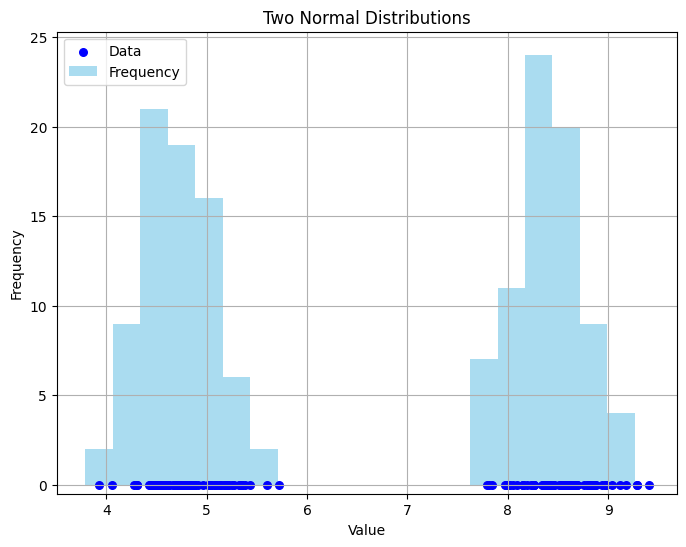

In [7]:
plot_data(data)